># **PROJECT: SPAM SMS DETECTION**

**Introduction:**

This model can classify SMS messages as spam or
legitimate.I have Used TF-IDF technique with
classifiers like Naive Bayes, Logistic Regression, and Support Vector
Machines to identify spam messages.

**Load necessary Libraries**

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Load Dataset**

In [66]:
data = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **Data Preprocessing**

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [68]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [69]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [70]:
print('Total number of duplicated rows in data:', data.duplicated().sum())

Total number of duplicated rows in data: 403


In [71]:
data.drop_duplicates(inplace=True)

In [72]:
#Convert labels to binary values (ham: 0, spam: 1)
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

In [73]:
data.dtypes

v1     int64
v2    object
dtype: object

In [74]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# Remove common stopwords using NLTK.
stop_words = set(stopwords.words('english'))

# Convert all text to lowercase
data['v2'] = data['v2'].str.lower()

# Remove punctuation marks using regular expressions.
data['v2'] = data['v2'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Split the text into individual words (tokens)
data['v2'] = data['v2'].apply(nltk.word_tokenize)

# Apply stemming to reduce words to their base form
stemmer = PorterStemmer()
data['v2'] = data['v2'].apply(lambda tokens: ' '.join([stemmer.stem(word) for word in tokens]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
data['v2'].dtype

dtype('O')

>**Data Visualizations**

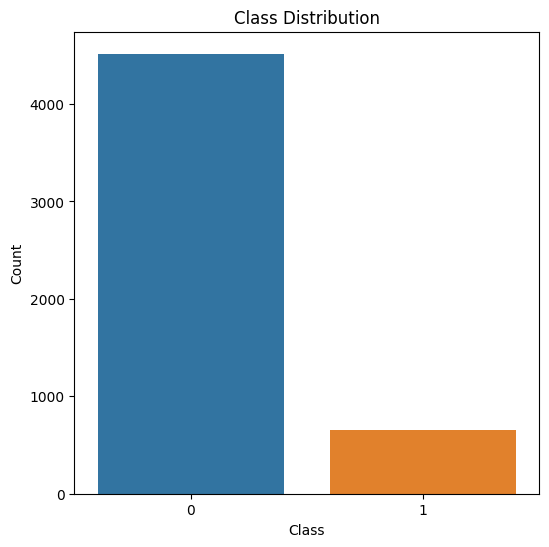

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='v1')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

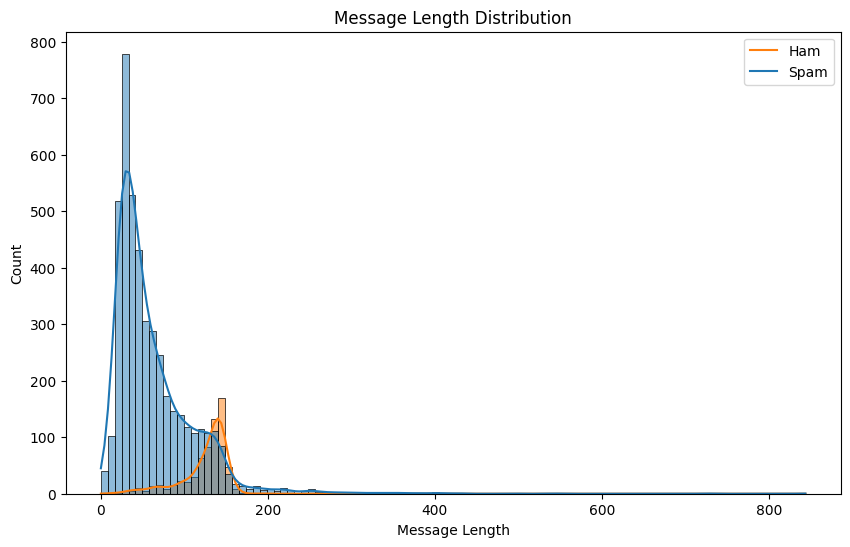

In [77]:
#Message Length Distribution
plt.figure(figsize=(10, 6))
data['message_length'] = data['v2'].apply(len)
sns.histplot(data=data, x='message_length', hue='v1', kde=True)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(labels=['Ham', 'Spam'])
plt.show()

># **Feature Extraction**

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  #can adjust the number of features
X = tfidf_vectorizer.fit_transform(data['v2'])

># **Train Test Split**

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['v1'], test_size=0.2, random_state=42)

># **Model Selection and Evaluation**

# **Naive Bayes Classifier**

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

nb_predictions = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, nb_predictions)

print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, nb_predictions))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       889
           1       1.00      0.71      0.83       145

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034



># **Logistic Regression**

In [81]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, logistic_predictions)

print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, logistic_predictions))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.96      0.70      0.81       145

    accuracy                           0.95      1034
   macro avg       0.96      0.85      0.89      1034
weighted avg       0.95      0.95      0.95      1034



># **Support Vector Machines**

In [82]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, svm_predictions))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.87      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



# **Best Model**
As it is clear from the results of Evaluation metrics(Accuracy, Precision, Recall, F1 Score, support) with the high scores that **"Support Vector Machines"** is the best model to use for test data.

**Model Testing with an email**

In [83]:
new_mail=["Congratulations you have won 10000$."]
new_data_features=tfidf_vectorizer.transform(new_mail)
prediction=svm_model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[0]
Spam Mail


**Confusion Matrix**

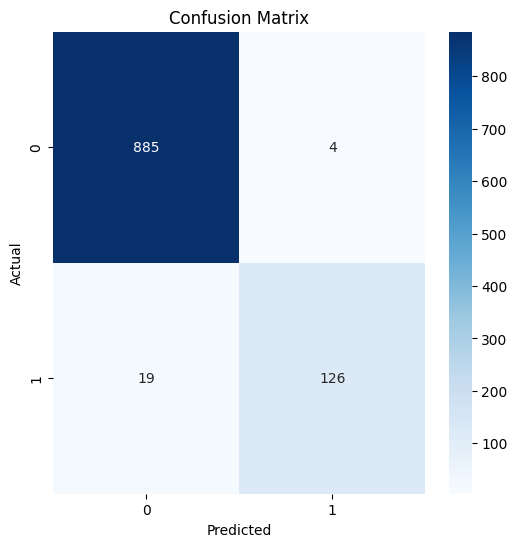

In [84]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()